<p style="float:right; text-align:center; font-size:8pt; color:#BEBEBE"><img src="ali-yahya-dybKaTp3mu4-unsplash.jpg" width="500" style="padding-top:25px; padding-left:25px; padding-right:25px;">image by Ali Yahya via unsplash.com</p>

# Machine Learning Engineer Nanodegree
## Capstone Project "Optimizing App Offers With Starbucks"

Ivanna Kacewica
<br />February 5th, 2020


**Author note**
<br />This is a single-authored project. Editorial "we" is used in the meaning of "the author and the reader" or "the author" (depending on the context). 


## I. Definition

### Project Overview

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. There are three types of offers that can be sent: buy-one-get-one (BOGO), discount, and informational. In a BOGO offer, a user needs to spend a certain amount to get a reward equal to that threshold amount. In a discount, a user gains a reward equal to a fraction of the amount spent. In an informational offer, there is no reward, but neither is there a requisite amount that the user is expected to spend. Offers can be delivered via multiple channels. Some users might not receive any offer during certain weeks [[1]](#references). Please refer to [Data Exploration](#Data-Exploration) section for more information and file overview.

Project goal is to deploy **two different machine learning models** that could potentially allow Starbucks to model their customers and personalize marketing efforts for much greater effectiveness.


### Problem Statement

1. **Customer segmentation via cluster analysis** - which groups of existing customers can we identify based on common demographic and behavioral characteristics? The goal of a cluster analysis is to accurately segment customers in order to achieve more effective customer marketing via personalization.

2. **Predictive marketing** - which type of offer should we use for every new customer - BOGO, discount, informational or none? Our goal is to deploy a model that is able to make predictions with such input and output:
 - input: gender, age, income and offer type
 - output: "no view", "no order" or "possible order".


### Summary of Solution Implementation Steps

Full **development code** is available in three Jupyter Notebooks:

[Part 1 (Notebook 1: exploration)](part-1-exploration.ipynb)

- Data exploration
- Data cleaning
- Exploratory data analysis (EDA)

[Part 2 (Notebook 2: clustering)](part-2-clustering.ipynb)

- Data preprocessing
- Data clustering
- Deploying final model
- Exploring the resultant clusters

[Part 3 (Notebook 3: predictions)](part-3-predictions.ipynb)

- Data preprocessing
- Training the model
- Improving the model
- Deploying final model
- Exploring the prediction results


### Algorithms and Metrics

### K-MEANS 
A common cluster analysis method is a mathematical algorithm known as **K-Means cluster analysis**, sometimes referred to as scientific segmentation. The clusters that result assist in better customer modeling and predictive analytics, and are also used to target customers with offers and incentives personalized to their wants, needs and preferences. The process is not based on any predetermined thresholds or rules. Rather, the data itself reveals the customer prototypes that inherently exist within the population of customers [[2]](#references). 

#### K-MEANS ALGORITHM METRICS:

For finding the best version of a model:
- **the elbow method** - the value of k at which improvement in distortion declines the most

For grouping data into clusters during model training:
- **msd** - mean squared distances between each record in the test set and the closest center of the model



### XGBOOST 

The **XGBoost (eXtreme Gradient Boosting)** is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler, weaker models. XGBoost has done remarkably well in machine learning competitions because it robustly handles a variety of data types, relationships, and distributions, and because of the large number of hyperparameters that can be tweaked and tuned for improved fits. This flexibility makes XGBoost a solid choice for problems in regression, classification (binary and multiclass), and ranking [[3]](#references). In our case we will be using **multiclass classification** with three output labels: "no view", "no order" and "possible order".



#### XGBOOST ALGORITHM METRICS:

For  finding the best version of a model:
- **multiclass classification error rate** - calculated as #(wrong cases) / #(all cases)

For evaluating the quality of our model’s predictions:
- **accuracy** - calculated as #(right) / #(all cases)
- **F1 score** - a weighted average of the precision and recall
- precision (as a part of the F1 score) - calculated as tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
- recall (as a part of the F1 score) - calculated as tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives


#### OUR BENCHMARK FOR THE XGBOOST MODEL

Considering that our input and output data for is not directly correlated, we will aim for the model that **performs correctly in at least half of the cases** for all labels (accuracy > 0.5) and has **F1 score of at least 0.7 for the "possible order" label** (our target of interest).


## II. Analysis

### Data Exploration

#### 1. DATA ASSESSMENT

There are 3 raw data files provided - portfolio.json, profile.json and transcript.json. We assume that the currency is US dollars.

1) **portfolio.json**
Offers sent during 30-day test period (10 offers x 6 fields)

Our dataframe name: **"offers"**

- reward: (numeric) money awarded for the amount spent
- channels: (list) web, email, mobile, social
- difficulty: (numeric) money required to be spent to receive reward
- duration: (numeric) time for offer to be open, in days
- offer_type: (string) bogo, discount, informational
- id: (string/hash)

In [2]:
offers

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


One complication about the provided data is that the offer "channel" information (email, mobile, social or web) was only encoded as a list in the portfolio.json, but not is the transcript.json, so even if we merge offer and transcript files together by the offer id, this "channel" information leads nowhere - we can't know which customer reacted to which channel. 

2) **profile.json**
Rewards program users (17000 users x 5 fields)

Our dataframe name: **"users"**

- gender: (categorical) M, F, O, or null
- age: (numeric) missing value encoded as 118
- id: (string/hash)
- became_member_on: (date) format YYYYMMDD
- income: (numeric)

In [3]:
print("Dimensionality:")
print(users.shape)
users.head(5)

Dimensionality:
(17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


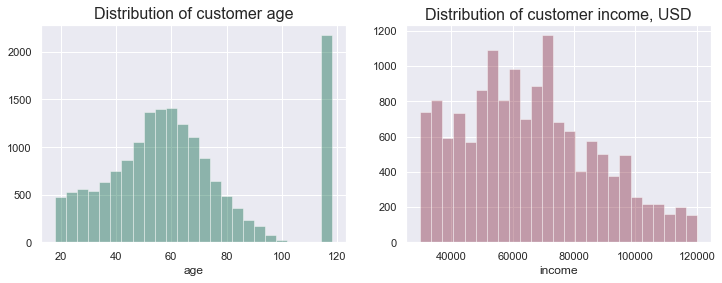

In the raw, uncleaned data, customer age is normally distributed and has many outlier values at 118 - which is the encoding for a missing value. The income is right-skewed which is expectable.

Unfortunately all **missing values in profile.json are common among the same 2175 people**. This makes it impossible to predict age based on income or the other way around (the same goes for gender). 

3) **transcript.json**
Event log (306648 events x 4 fields)

Our dataframe name: **"events"**

- person: (string/hash)
- event: (string) offer received, offer viewed, transaction, offer completed
- value: (dictionary) different values depending on event type
 - offer id: (string/hash) not associated with any "transaction"
 - amount: (numeric) money spent in "transaction"
 - reward: (numeric) money gained from "offer completed"
- time: (numeric) hours after start of test

In [5]:
print("Dimensionality:")
print(events.shape)
events.head(5)

Dimensionality:
(306534, 4)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


#### 2. CLEANING THE DATA

#### Characteristics of the data that need to be addressed:

Dataset challenges:
- The "transaction" event does not have any "offer_id" associated to it, so we have to figure out which transactions are connected to particular offer and which ones are not (customer bought something casually).
- Informational offer can not be "completed" due to it's nature, so we need to find a way to connect it with the possible transactions. 
- Some demographic groups will make purchases regardless of whether they receive an offer. Ideally we would like to group them separately.
- A user can complete the offer without actually seeing it. In this case user was making a regular purchase and offer completed automatically. This is not a result of particular marketing campaign but rather a coincidence.

Data quality issues:
- Null values for "gender" and "income" in profile.json
- Age: missing value encoded as 118 in profile.json
- Incorrect data format (int64 instead of datetime) in profile.json
- Column names can be improved
- Incompatible units - offer duration days vs. event time in hours
- Different keys in transcript.json - "event id" and "event_id"

Data tidiness issues:
- List values in "channels"
- Dictionary values in "value"
- Some rows can be merged together in transcript.json 

#### Data cleaning implementation process:

1. Add more convenient ids for 10 types of offer: "short_offer_id"
- Convert offer duration from days to hours: "duration_hrs"
- Fix incorrect data format in datetime column "became_member_on"
- Create new column "days_of_membership"
- Decide what to do with missing values in individual tables
- Fix the "value" column in "events"
- Encode "channels" using a one-hot encoding scheme
- Encode "event" using a one-hot encoding scheme
- Remove the extra "offer id" column (and transfer values to a correct column)
- Connect "transaction" with "offer completed"
- Connect "offer viewed" with "offer completed"
- Make new event category for offers completed by accident: "auto completed"
- Improve column naming
- Merge tables together
- Connect "transaction" with "informational" offer
- Overview and save combined data frame

Full data cleaning and exploration code is available in [Notebook 1](part-1-exploration.ipynb). After we addressed various data issues and decided how to group data for a best possible results, we had all the completed offers (BOGO, discount, informational) encoded as "offer completed" and all unintentionally completed offers as "auto completed". All the "transaction" rows represented the casual purchases that were not connected to any offer. Note that after merging the data there were some new Null values, but we did not fill them in right away because they make sense. This is how our combined dataset looked after all the data cleaning steps were implemented successfully:

In [14]:
df = pd.read_csv('data/clean_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   possible_reward        138610 non-null  float64
 1   spent_required         138610 non-null  float64
 2   duration               138610 non-null  float64
 3   offer_type             138610 non-null  object 
 4   offer_id               138610 non-null  object 
 5   short_offer_id         138610 non-null  object 
 6   duration_hrs           138610 non-null  float64
 7   channel_email          138610 non-null  float64
 8   channel_mobile         138610 non-null  float64
 9   channel_social         138610 non-null  float64
 10  channel_web            138610 non-null  float64
 11  gender                 239558 non-null  object 
 12  age                    239558 non-null  int64  
 13  person                 239558 non-null  object 
 14  became_member_on       239558 non-nu

### Exploratory Visualizations

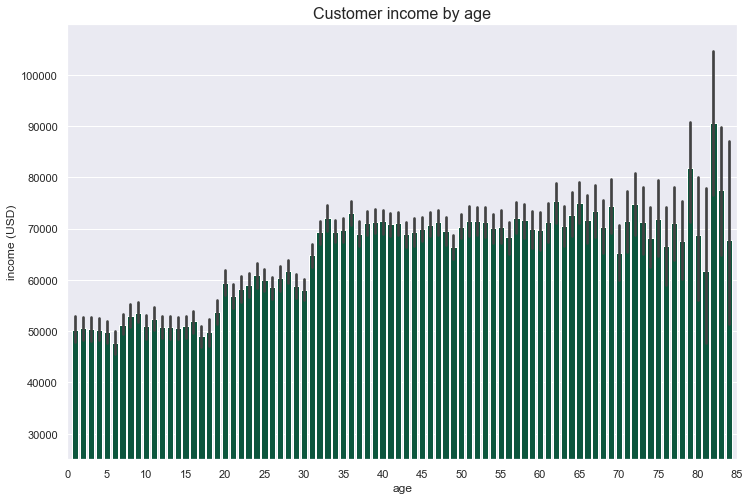

Age and income are strongly correlated variables which is expectable and intuitive.

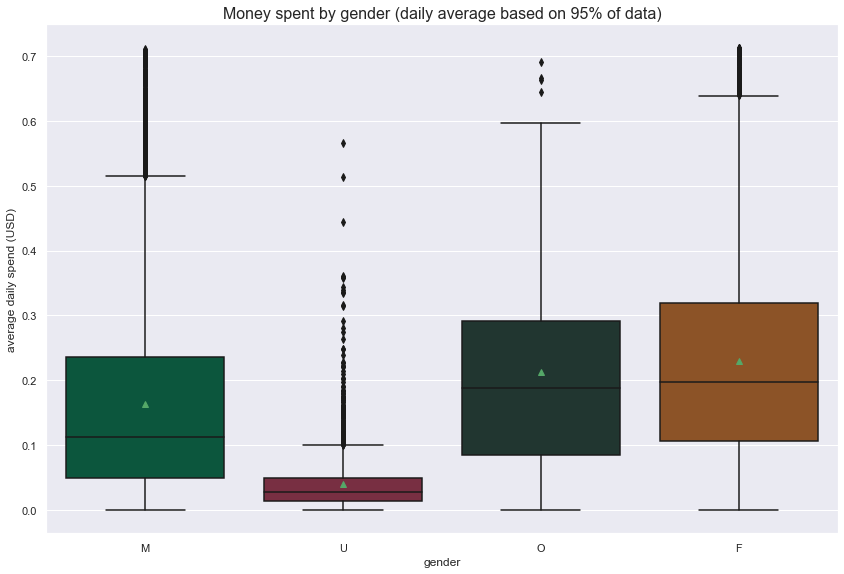

Mean values:
  gender  daily_spend_avg
0      F         0.229637
1      M         0.163935
2      O         0.213336
3      U         0.040635


If we remove extreme outliers and look at the average daily spend distribution, we see that female customers tend to spend more with mean daily spend of 0.23 USD. The less spending customers are the "unknown" ones - customers who did not provide any demographic data to the program.

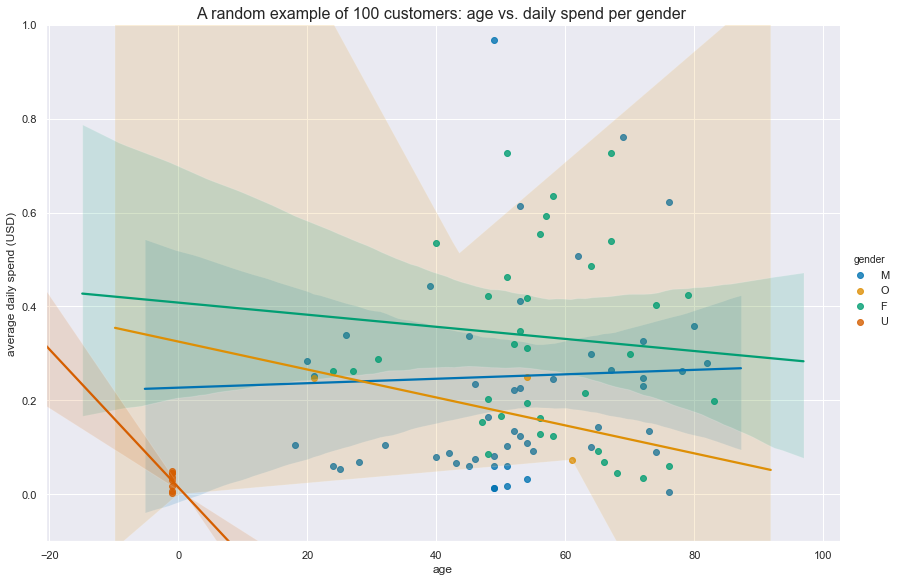

This group of random 100 customers also shows that women spend more than men and "unknown" customers spend less than 0.10 USD daily on average. In this particular group female customers spend less with age increasing and the opposite is true for male, but the sample is too small to draw general conclusions about other customers.

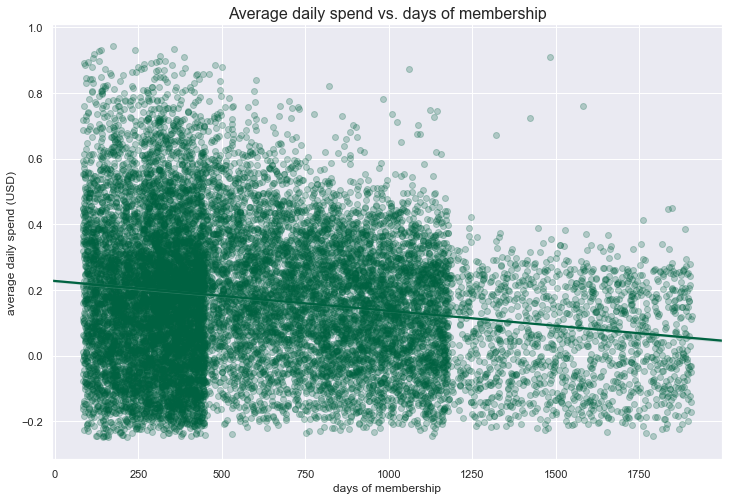

The graph above shows that average daily spend decreases for customers who are registered in the program for a longer time. Average daily spend of 3+ years customers doesn't go higher than 0.40 USD for the most of customers.

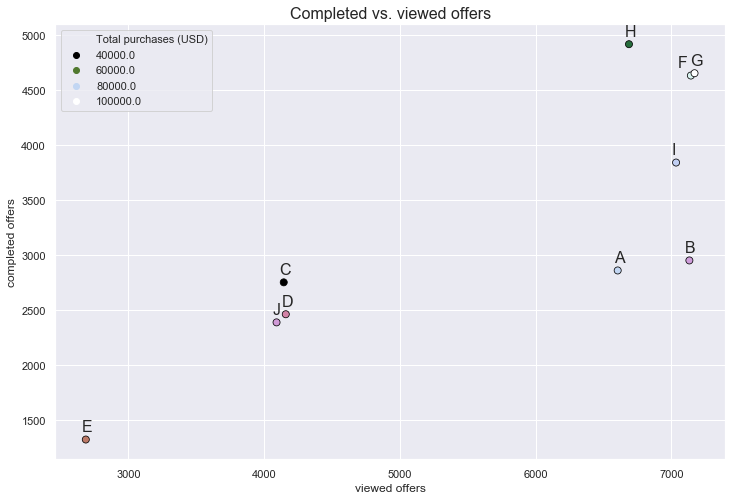

Here we observe the ratio of completed vs. viewed offers for each of 10 possible offers. "H", "F" and "G" offers are performing quite well based on this metric. If we look at **total purchase sum** per offer, "F" and "G" would be leaders again, but not the "H".

More visualisations are available in [Notebook 1](part-1-exploration.ipynb).

## III. Machine Learning Methodology

### Data Preprocessing Steps

Common steps for both models:

- Clean the data (see [Data Exploration](Data-Exploration) section) 
- Drop the "unknown" customer data
- Drop the columns that will not be used for clustering

Algorithm specific steps:

#### K-MEANS ALGORITHM:

- Encode "gender" using a one-hot encoding scheme
- Group data by customer id
- Fill in missing values
- Data standardization
- Consider principal component analysis (PCA) implementation
- Create formatted, k-means training data

#### XGBOOST ALGORITHM :

- Prepare data labels - "no view", "no order", "possible order"
- Convert labels to numeric
- Check for missing values
- Encode "gender" and "offer_type" using a one-hot encoding scheme
- Drop the "person" and "label" columns
- Split the data to input features (X) and output labels (y)
- Split the rows up into train, test and validation sets
- Save the data locally as CSV files
- Upload the data files to S3


### Model Implementation Steps 

#### K-MEANS ALGORITHM:

1. Identify optimal k for k-means using the elbow method
- Deploy final k-means model
- Pass in the training data and assign predicted cluster labels
- Shut down the endpoint


#### XGBOOST ALGORITHM :

1. Construct the estimator object
- Set model specific hyperparameter default values
- Train model on default parameters
- Test default model performance
- Refine the model (see [Refinement](Refinement) section)
- Deploy final XGBoost model into production
- Generate predictions for new customers
- Shut down the endpoint


### Refinement

We used the Elbow Method to find the best K-means model out of the 14 initial models. In the graph below we plot the Euclidean distance to the cluster centroid. You can see that the error decreases as k gets larger. This is because when the number of clusters increases, they should be smaller, so distortion is also smaller. This produces an “elbow effect” in the graph. The idea of the elbow method is to choose **the k at which the rate of decrease sharply shifts** [[4]](#references).

Based on the graph below, k=3 is a good cluster size for our dataset, the distortion "drop" before k=3 is the largest:

model_algo-1
state_040bc648-c1f1-41ad-883c-bd17f1cfc0c6
state_e7130caf-a76d-47f0-990b-8fd2715ed048
model_algo-1
model_algo-1
state_5bb1478d-67a6-40f8-8bdb-c6b687992886
state_d9f88e92-72b3-44d8-9653-3a295b8bcfa3
model_algo-1
state_17e306f3-9958-4832-b2dd-ca45ea21a70e
model_algo-1
state_1fae3777-2833-4a6b-9cb6-a247eee59523
model_algo-1
model_algo-1
state_15aa9a42-c5a2-4086-9abd-d95094f0ab02
model_algo-1
state_83de7b6c-551f-4c87-bbda-aa0340ec141d
state_010e05e5-cdf6-44cc-a3de-10fd6787f9e2
model_algo-1
model_algo-1
state_e64dd00c-82ab-4e29-bad6-dc2b3f0ed3a2
state_03586f8c-0575-4eef-91e6-725a367869fc
model_algo-1
state_da9daf8d-bd82-46c7-bbdc-2fb981ff3129
model_algo-1
state_dd3ac684-0688-4b8e-bd87-b8146261a413
model_algo-1
state_76aa1baa-d517-4fa9-be35-c5bdcaff0116
model_algo-1


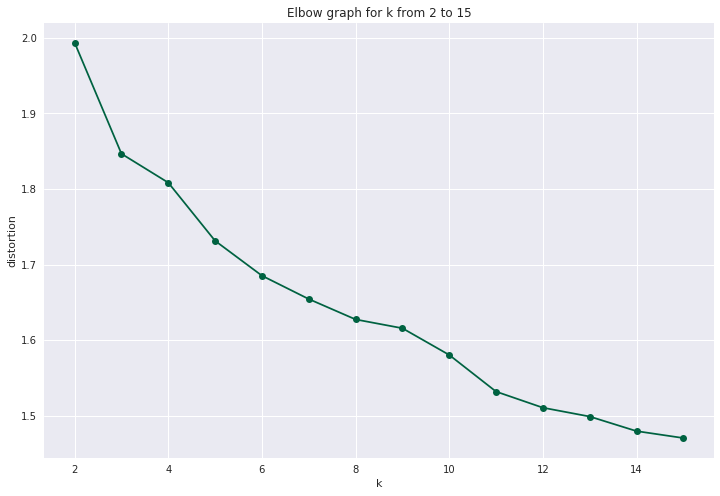

As for the XGBoost model, our strategy was to train the first model on default hyperparameters and then implement Amazon Sagemaker's **hyperparameter tuning** function. To find the best values for hyperparameters, we can specify ranges of values that Amazon SageMaker hyperparameter tuning searches to find the combination of values that results in the training job that performs the best as measured by the objective metric that we chose. Hyperparameter tuning launches training jobs that use hyperparameter values in the ranges that we specified, and returns the training job with highest AUC (Area Under The Curve [[5]](#references).


We used following hyperparameters to refine the initial model:

- **eta**: Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.

- **gamma**: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

- **max_depth**: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

- **subsample**: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration [[6]](#references).


Our **initial accuracy score was 0.55**. We trained **32 new models** to perform a hyperparameter tuning job. To compare the trained models, we used **merror**: multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases). The merror metric has to be minimized, so our final model is one with the lowest merror.


## IV. Results

The Amazon SageMaker k-means algorithm is an **unsupervised** algorithm that groups data into clusters whose members are as similar as possible. Because it is unsupervised, it doesn't use a validation dataset that hyperparameters can optimize against [[7]](#references). In our case we also didn't have any target clusters defined. To evaluate the final model, we needed to explore the resulting clusters and see if we can use them in order to achieve more effective customer marketing via personalization. We ended up with **3 groups of customers**  partitioned from 7 demographic and behavioral observations.  

For evaluating the XGBoost model, we used the evaluation metrics described earlier in the [Metrics](Algorithms-and-Metrics) section. The final results are better than the benchmark result reported earlier. After hyperparameter tuning we were able to achieve the **accuracy score of 0.605** and **F1 score for the "possible order" label of 0.74**. 

The graph below shows the predicted vs. true labels in our test dataset. Final **model is able to predict a purchase in 61% of cases** (please see [Notebook 3](part-3-predictions.ipynb) for full classification report and metrics per each label).

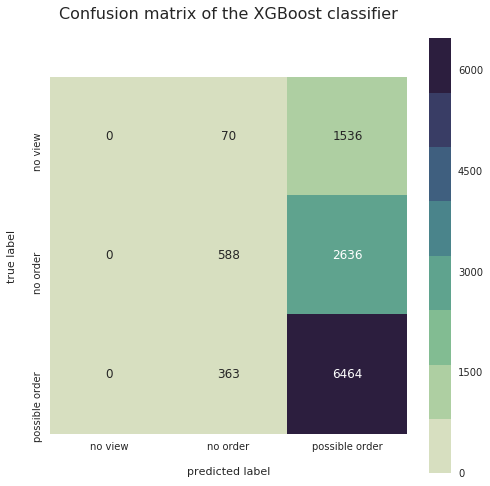

## V. Conclusion

### Final models and solution

#### K-MEANS ALGORITHM:

Following visualizations show the resulting clusters across different dimensions. We have **3 clusters named "A" (zero), "B" (one) and "C" (two)**. These groups do not include "unknown" customers, which can actually form a **fourth cluster** is necessary for marketing purposes.

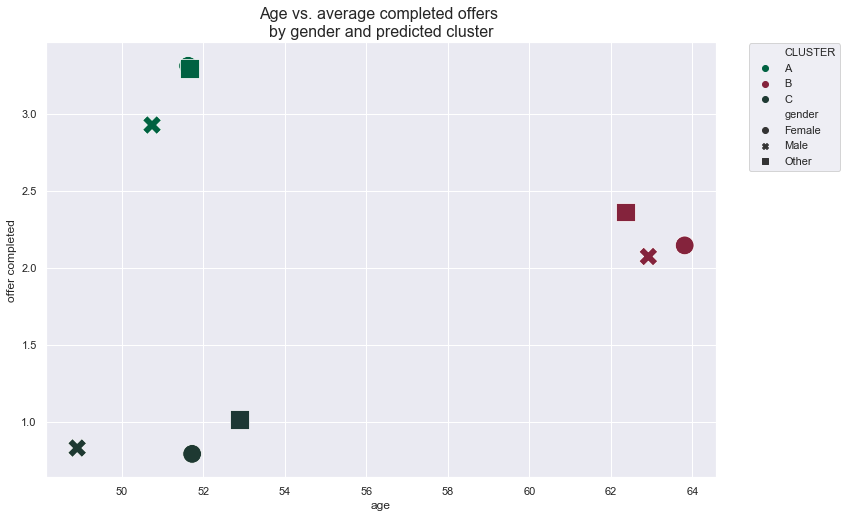

In the graph above we observe the clustering results after grouping the customers by gender. Mean age of all three groups is above 40 years old, which is also true for our initial dataset. Cluster "A" customers complete more offers on average than cluster "C". Cluster "B" is in between in terms of completing offers and has older members compared to "A" and "C". 

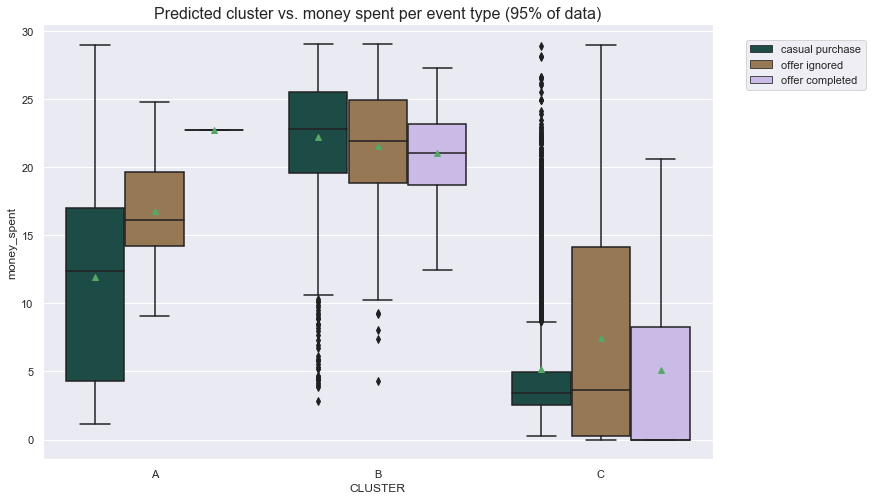

Here we can look at each cluster purchasing patterns. Cluster "A" had the most clients who make purchases without any promotional offers, spending between 5 and 18 USD in general. Cluster "C" completes a lot of offers but doesn't spend much on them. Cluster **"B" is spending the most**, with both casual and promotional purchases over 18 USD per transaction, which makes it our **target of interest cluster**.

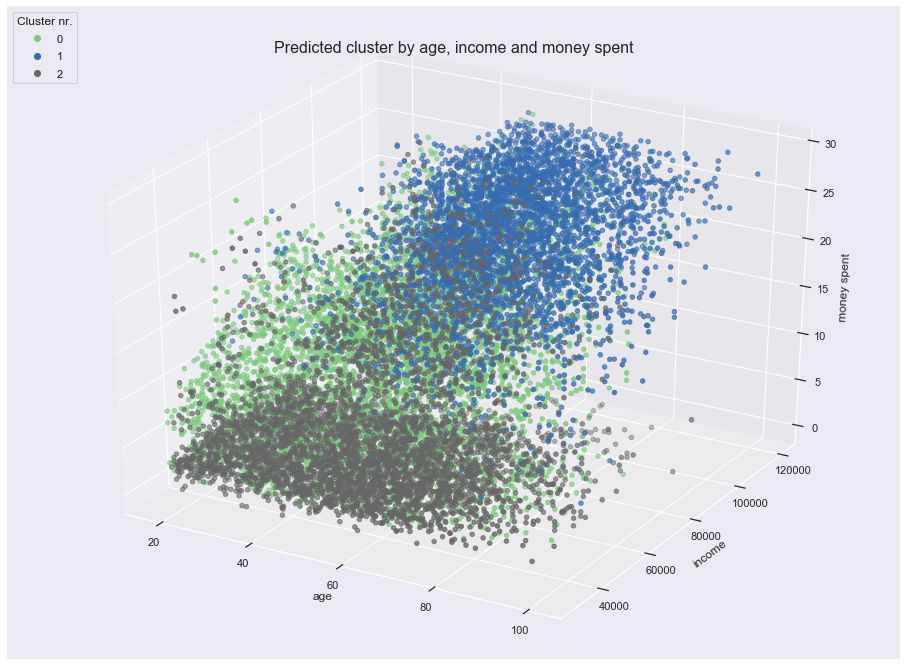

If we look at all data points across 3 dimensions - age, income and money spent, we can also confirm that our target cluster is 1 (or "B"). Customers in this cluster have both **higher income and higher spendings**. Cluster 0 (or "A") is located somewhere in between and we have to remember from previous visualization that these clients are not really sensitive to offers. Cluster 2 (or "C") has a lower income and less spending customers.

This project will not focus on building marketing campaigns, but for the purpose of example cluster interpretation could look like this:

- Cluster "A" - Send informational offers once a month
- Cluster "B" - Send different offer types, one offer in two weeks
- Cluster "C" - Send money saving promotions (BOGO and discount) every week

Please see [Notebook 2](part-2-clustering.ipynb) for more visualizations of the clustering results.

#### XGBOOST ALGORITHM:

The purpose of this model is to be able to use existing data to target **new customers** with offers. When new customer registers in the Starbucks Rewards® program, we can feed it's data to the deployed model and draw a conclusions about possible offer types for this customer. We didn't have real data about new customers, so we we generated this data randomly. 

The **example output** on new, simulated data looks like this:

<br />

<img src="new-customer-1.png"/>
<img src="new-customer-2.png"/>
<img src="new-customer-3.png"/>

From above results marketing team could for example decide to send a young girl and a men the discount offer (very low probability of ignoring it and high probability of completing), and send an adult woman BOGO offer.

### Reflection

We worked with 3 raw data files - portfolio.json (10 offers x 6 fields), profile.json (17000 users x 5 fields) and transcript.json (306648 events x 4 fields).

The files are not very straightforward to wrangle and require some creativity to process. After we addressed various data issues and decided how to group data for a best possible results, we had all the completed offers (BOGO, discount, informational) encoded as "offer completed" and all unintentionally completed offers as "auto completed". All the "transaction" rows represented the casual purchases that were not connected to any offer.

After data was cleaned and properly modified, we used some grouping and plotting techniques to visually explore the results and draw some conclusions about possible correlations and dependencies between variables, such as:

- Female customers tend to spend more with mean daily spend of 0.23 USD. The less spending customers are the "unknown" ones - customers who did not provide any demographic data to the program.

- Average daily spend decreases for customers who are registered in the program for a longer time. Average daily spend of 3+ years customers doesn't go higher than 0.40 USD for the most of customers.

In the second part of the project, we further preprocessed data and implemented the K-Means model to cluster our existing customers into groups that can be useful for planning marketing campaigns. To understand how the 7 observations are divided between 3 clusters, we made different types of plots across different dimensions. That helped us to see what kind of customers are belonging to each group and also define the "target of interest" group - customers who can potentially spend more. Cluster "A" has the most clients who make purchases without any promotional offers, spending between 5 and 18 USD in general. Cluster "C" completes a lot of offers but doesn't spend much on them. Cluster "B" is spending the most, with both casual and promotional purchases over 18 USD per transaction, which makes it our target of interest cluster.

K-Means was helpful with grouping existing customers, but in the third part we also focused on the future customers and on how can we use existing data to make predictions about any new customer who will register in the rewards program. We successfully deployed multiclass classification model via gradient boosting algorithm and were able to predict the outcome per each offer type with 61% accuracy.


### Improvement

The potential aspects of the implementation that could be improved in future:

1. Some code cells in the EDA part take up to 15 minutes to process (on a local CPU). One could work on further improving this code, for example divide it into smaller functions, refactoring using different libraries and techniques.
2. We trained K-Means model on default hyperparameters and relied on the Elbow Method. One could try to improve the model by implementing Amazon Sagemaker hyperparameter tuning. Hyperparameters that have the greatest impact on k-means objective metrics are: mini_batch_size, extra_center_factor, and init_method [[7]](#references).
3. One could try to achieve higher accuracy and F1 score for the gradient boosting algorithm. This could be done by further investigating which hyperparameters result in better model performance.
4. Our XGBoost model is not very strong in predicting the "no view" label. This should be further investigated and improved.
5. There are other ways to implement machine learning for this dataset, for example one could build a model to predict a transaction value based on input data about the customer.

---


### References

Custom color palette inspired by the **Starbucks "Fall" color palette** available from https://creative.starbucks.com/color/

[1] Udacity. (n.d.). Starbucks Capstone Challenge. Retrieved from: https://classroom.udacity.com/

[2] Mobius Solutions. (n.d.). Customer Segmentation via Cluster Analysis. Retrieved from https://www.optimove.com/resources/learning-center/customer-segmentation-via-cluster-analysis

[3] Amazon Web Services, Inc. (n.d.) XGBoost Algorithm. Retrieved from: https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost.html

[4] Gitansh Chadha, Piali Das, and Zohar Karnin. (2018.) K-means clustering with Amazon SageMaker. Retrieved from: https://aws.amazon.com/blogs/machine-learning/k-means-clustering-with-amazon-sagemaker/

[5] Amazon Web Services, Inc. (n.d.) Perform Automatic Model Tuning. Retrieved from: https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning.html

[6] xgboost developers. (n.d.) XGBoost Parameters. Retrieved from: https://xgboost.readthedocs.io/en/latest/parameter.html

[7] Amazon Web Services, Inc. (n.d.) Tune a K-Means Model. Retrieved from: https://docs.aws.amazon.com/sagemaker/latest/dg/k-means-tuning.html

Customer photos via https://generated.photos/